References

1. [PromptHero guide](https://github.com/paddleboard-ai/useful-notebooks/blob/main/LocalJourney.ipynb)

In [1]:
%pip install --upgrade \
  diffusers \
  transformers \
  safetensors \
  sentencepiece \
  accelerate \
  bitsandbytes \
  torch \
  huggingface_hub --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 2.1.2 which is incompatible.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 2.1.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from huggingface_hub import login

login()

### Basic Imports

In [4]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler, AutoencoderKL
import torch
pipe = DiffusionPipeline.from_pretrained(
    "prompthero/openjourney", 
    torch_dtype=torch.float16
)
vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse", torch_dtype=torch.float16).to("cuda")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.vae = vae
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

In [77]:
def generate_images(prompt, num_steps, num_variations, prompt_guidance, dimensions):
    random_seeds = [random.randint(0, 65000) for _ in range(num_variations)]
    images = pipe(prompt= num_variations * [prompt],
              num_inference_steps=num_steps,
              guidance_scale=prompt_guidance,
              height = dimensions[0],
              width = dimensions[1],
              generator = [torch.Generator('cuda').manual_seed(i) for i in random_seeds]
             ).images
    return images

In [78]:
import random


In [79]:
# Setting for image generation
prompt = 'Small happy dog anf owner learning to walk on a rainy day. Colored photography. Leica lens. Hi-res. hd 8k --ar 2:3'
num_steps = 100
num_variations = 4
prompt_guidance = 8
dimensions = (400, 600) # (width, height) tuple
random_seeds = [random.randint(0, 65000) for _ in range(num_variations)]

In [81]:
images = generate_images(prompt, num_steps, num_variations, prompt_guidance, dimensions)

  0%|          | 0/100 [00:00<?, ?it/s]

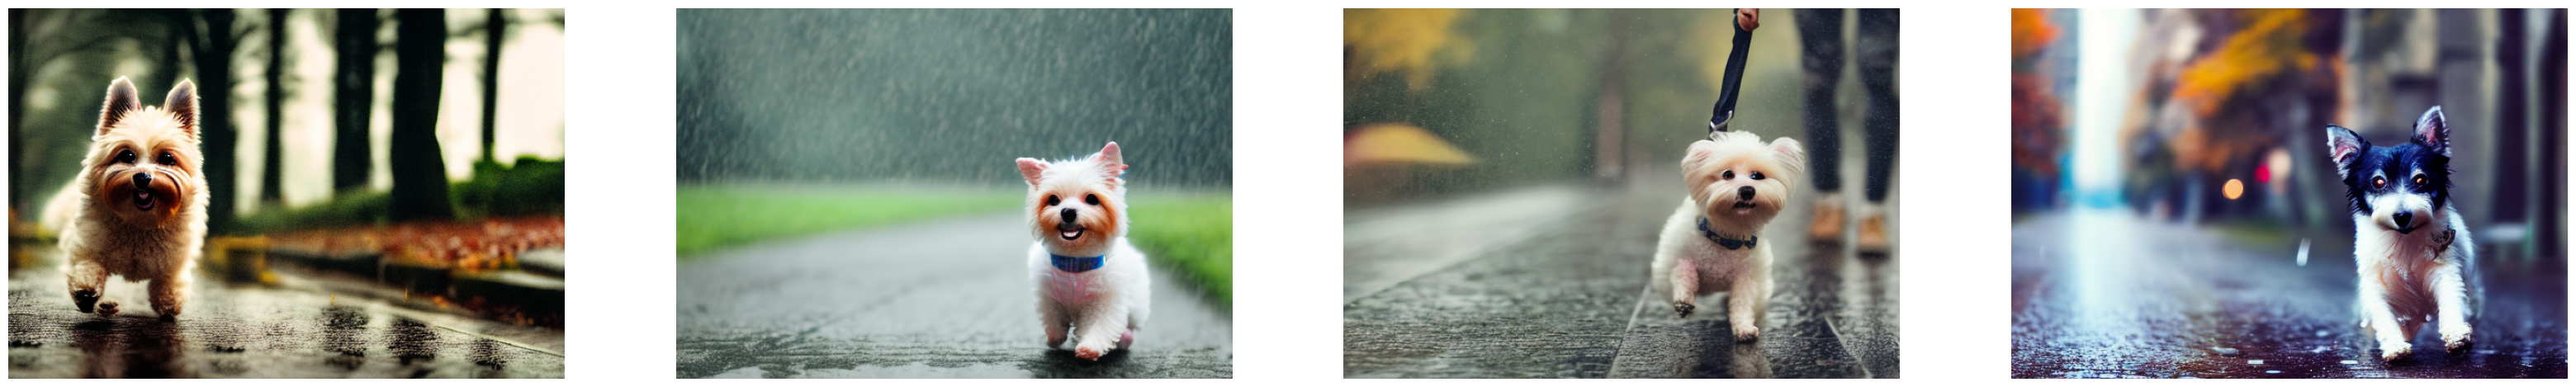

In [82]:
# Display the images in a grid
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import io

def display_images(images, num_variations, dimensions):
    fig = plt.figure(figsize=(dimensions[0]/10, dimensions[1]/10))
    columns = num_variations
    rows = 1
    for i in range(1, columns*rows +1):
        img = images[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        # hide axes
        plt.axis('off')
    plt.show()
    
display_images(images, num_variations, dimensions)

In [85]:
prompt = "Hard working Indian students sitting in a classroom early morning for a 8 AM lecture on machine learning."


images = generate_images(prompt, num_steps, num_variations, prompt_guidance, dimensions)

  0%|          | 0/100 [00:00<?, ?it/s]

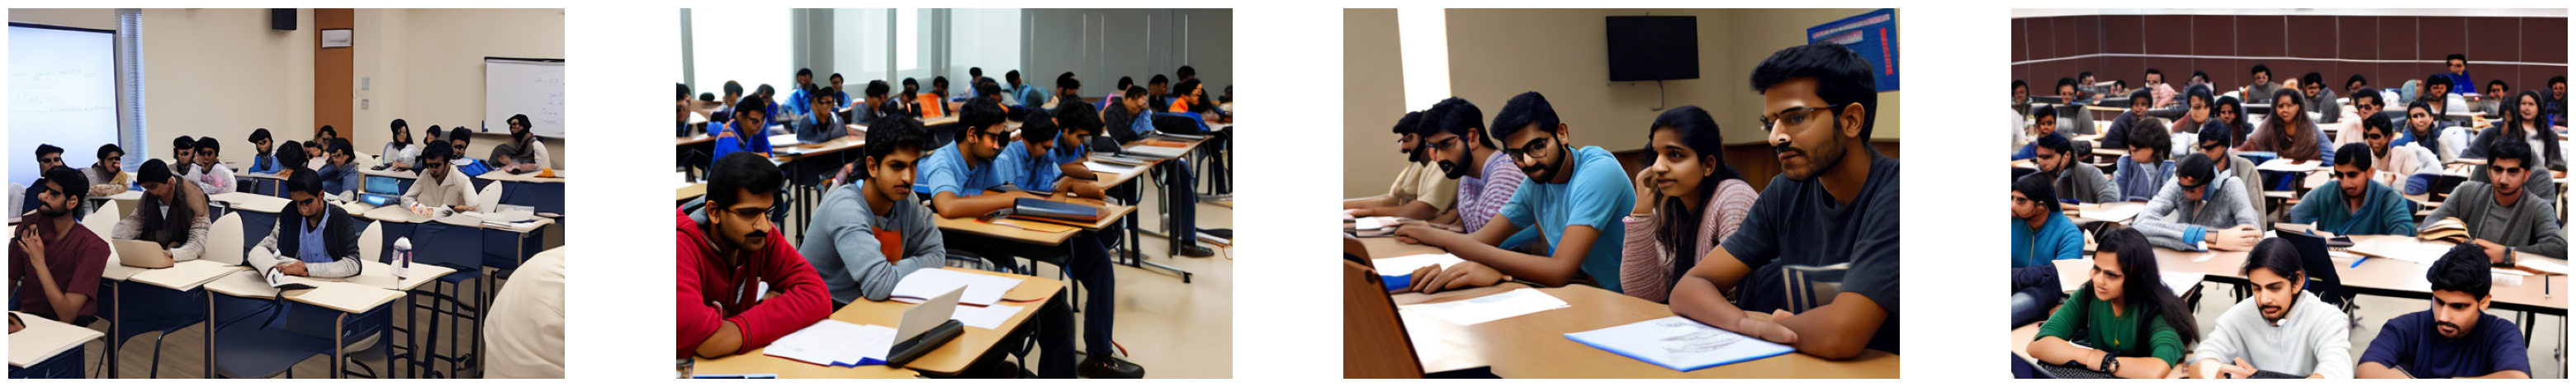

In [86]:
display_images(images, num_variations, dimensions)